# Rail Performance

In [1]:
%load_ext autoreload
%autoreload 2

%run relativepath.py
%run commonimports.py
%run displayoptions.py
%matplotlib inline

2019-05-06 14:19:07,737 Property "cache_dir" set to data


In [2]:
from IPython.display import HTML, display

## Load Rail Data

In [3]:
RAIL_DATASET_URL ='https://www150.statcan.gc.ca/n1/tbl/csv/23100274-eng.zip'
dataset = StatscanZip(RAIL_DATASET_URL)
rail_df = dataset.get_data()

2019-05-06 14:19:11,241 Reading file data/23100274.csv


In [4]:
rail_df.head()

,REF_DATE,GEO,Companies,Terminal dwell-time
0,2018-11-24,Canada,"Canadian National, System-wide",18.6
1,2018-11-24,Canada,"Canadian National, Edmonton terminal, Alberta",9.6
2,2018-11-24,Canada,"Canadian National, Vancouver terminal, British Columbia",22.8
3,2018-11-24,Canada,"Canadian National, Winnipeg terminal, Manitoba",13.5
4,2018-11-24,Canada,"Canadian National, MacMilllan yard, Ontario",18.8


In [5]:
dataset.get_metadata().cube_info.T

,Product Id,CANSIM Id,URL,Cube Notes,Archive Status,Frequency,Start Reference Period,End Reference Period,Total number of dimensions
Cube Title,,,,,,,,,
"Weekly rail terminal performance indicator, Transport Canada",23100274,NaN,https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=2310027401,1,CURRENT - a cube available to the public and that is current,Weekly,2018-11-24,2019-04-13,3


## Extract Locations

In [6]:
location_columns = rail_df.Companies.str.extract(r'([^,]*), ([^,]*),? ?([^,]*)?',)
location_columns.columns = ['Company', 'Location','Province']

In [7]:
rail_data = pd.concat([rail_df, location_columns], axis=1).drop(columns=['GEO','Companies']).set_index('REF_DATE').dropna(subset=['Terminal dwell-time'])

In [8]:
rail_data.head(10)

,Terminal dwell-time,Company,Location,Province
REF_DATE,,,,
2018-11-24,18.6,Canadian National,System-wide,
2018-11-24,9.6,Canadian National,Edmonton terminal,Alberta
2018-11-24,22.8,Canadian National,Vancouver terminal,British Columbia
2018-11-24,13.5,Canadian National,Winnipeg terminal,Manitoba
2018-11-24,18.8,Canadian National,MacMilllan yard,Ontario
2018-11-24,6.8,Canadian National,Taschereau yard,Quebec
2018-11-24,22.2,Canadian National,Prince George yard,British Columbia
2018-11-24,17.8,Canadian National,Saskatoon yard,Saskatchewan
2018-11-24,20.7,Canadian National,Brampton intermodal,Ontario


## System Wide

In [9]:
rail_system_wide = rail_data.query("Location=='System-wide'").drop(columns=['Province','Location'])

In [10]:
rail_system_wide.head(20)

,Terminal dwell-time,Company
REF_DATE,,
2018-11-24,18.6,Canadian National
2018-11-24,15.9,Canadian Pacific
2018-11-24,15.0,Burlington Northern Santa Fe
2018-12-01,19.4,Canadian National
2018-12-01,15.1,Canadian Pacific
2018-12-01,17.2,Burlington Northern Santa Fe
2018-12-08,19.7,Canadian National
2018-12-08,16.9,Canadian Pacific
2018-12-08,13.1,Burlington Northern Santa Fe


## Canada Pacific

In [11]:
cp_system_wide = rail_system_wide.query("Company =='Canadian Pacific'")
cp_system_wide.head(4)

,Terminal dwell-time,Company
REF_DATE,,
2018-11-24,15.9,Canadian Pacific
2018-12-01,15.1,Canadian Pacific
2018-12-08,16.9,Canadian Pacific
2018-12-15,16.4,Canadian Pacific


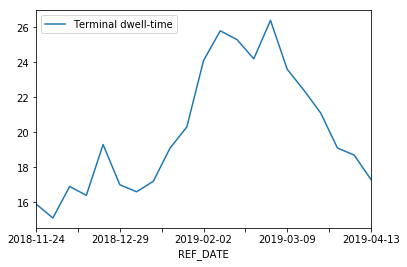

In [12]:
cp_system_wide.plot()

In [21]:
import hvplot.pandas
cp_system_wide[['Terminal dwell-time']].hvplot()

[autoreload of bokeh.model failed: Traceback (most recent call last):
  File "/home/tomi/anaconda3/envs/openCan/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 244, in check
    superreload(m, reload, self.old_objects)
  File "/home/tomi/anaconda3/envs/openCan/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 378, in superreload
    module = reload(module)
  File "/home/tomi/anaconda3/envs/openCan/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/home/tomi/anaconda3/envs/openCan/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 728, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/home/tomi/anaconda3/envs/openCan/lib/python3.7/site-packages/bokeh/model.py", line 276, in <module>
    class Model(with_metac

ImportError: cannot import name 'silence' from 'bokeh.core.validation' (/home/tomi/anaconda3/envs/openCan/lib/python3.7/site-packages/bokeh/core/validation/__init__.py)

## By Company

In [15]:
by_company = rail_system_wide.reset_index().set_index(['REF_DATE', 'Company'])

In [16]:
by_company.hvplot('REF_DATE', groupby='Company', width=600, dynamic=False)

AttributeError: 'DataFrame' object has no attribute 'hvplot'

In [ ]:
rail_data.index.dtype